# Predicting House Prices in King County with Linear Regression

## Problem Statement
---------------------------

The problem on hand is to predict the price of a home based on a collection of specific characteristics describing it. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices.

<img src="https://static.seattletimes.com/wp-content/uploads/2018/10/111313-780x502.jpg" title="source: imgur.com" />

----------------------------
## Data Information
---------------------------



Attribute Information (in order):

--------------------------------------------
| Variable      | Description                                   |
|---------------|-----------------------------------------------|
| Price         | Prices of the houses (Target Variable)         |
| Bedrooms      | Number of bedrooms                            |
| Bathrooms     | Number of bathrooms                           |
| Floors        | Number of floors                              |
| sqft_livin    | Square footage of the home                    |
| sqft_lot      | Square footage of the lot                     |
| floors        | Total floors (levels) in house                |
| waterfront    | House with a view to a waterfront             |
| view          | Has been viewed                               |
| condition     | Overall condition of the house                |
| grade         | Overall grade given to the housing unit       |
| sqft_above    | Square footage of house apart from basement   |
| sqft_bmnt     | Square footage of the basement                |
| yr_built      | Built year                                    |
| yr_renov      | Year when house was renovated                 |
| zipcode       | Zip code                                      |
| lat           | Latitude coordinate                           |
| long          | Longitude coordinate                          |
| sqft_l15      | Living room area in 2015 (some renovations)   |
| sqft_lt15     | Lot size area in 2015 (some renovations)      |





[Link to detailed variable definitions](https://github.com/shwetapai/Predicting-House-Prices-in-King-County)

### We will start be importing the necessary libraries

In [1]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import libraries for model evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Read in the data

In [2]:
import requests
import pandas as pd
from io import StringIO

orig_url="https://drive.google.com/file/d/1-Ywo-pFM-O0oqItarUrIgC9qaMx62GO3/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df = pd.read_csv(csv_raw, sep=",")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1001200035,20150306T000000,"$272,450.00",3,1.0,1350,7973,1.5,0,0,...,7,1350,0,1954,0,98188,47.4323,-122.292,1310,7491
1,1001200050,20140923T000000,"$259,000.00",4,1.5,1260,7248,1.5,0,0,...,7,1260,0,1955,0,98188,47.4330,-122.292,1300,7732
2,1003000175,20141222T000000,"$221,000.00",3,1.0,980,7606,1.0,0,0,...,7,980,0,1954,0,98188,47.4356,-122.290,980,8125
3,1003400155,20140811T000000,"$233,000.00",3,1.0,1100,7657,1.0,0,0,...,7,1100,0,1955,0,98188,47.4374,-122.285,1300,8000
4,1003400245,20141201T000000,"$179,950.00",3,1.0,1130,9907,1.0,0,0,...,7,1130,0,1954,0,98188,47.4362,-122.286,1320,9907


### Problem 1.a. Get some information about the dataset using the info() method

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  object 
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Problem 1.b. Obervations
* Every entity is non-null type
* We've got 2 entities under the object data type

### Handling Object Data
In order to perform the mathematical operations we need to do, any variables with the "object" data type need to be converted to numerical (or boolean)

Sample code to remove symbols and convert to float

In [4]:
ex='$179,950.00'
float(ex[1:].replace(',',''))


179950.0

Create a function to automate this operation

In [5]:
def to_num(x):
    val=float(x[1:].replace(',',''))
    return val

Test the function on a single instance

In [6]:
ex='$179,950.00'
to_num(ex)

179950.0

#### Apply the function to the price column to change all values to floats.

In [7]:
df['price']=df['price'].apply(to_num)

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1001200035,20150306T000000,272450.0,3,1.0,1350,7973,1.5,0,0,...,7,1350,0,1954,0,98188,47.4323,-122.292,1310,7491
1,1001200050,20140923T000000,259000.0,4,1.5,1260,7248,1.5,0,0,...,7,1260,0,1955,0,98188,47.4330,-122.292,1300,7732
2,1003000175,20141222T000000,221000.0,3,1.0,980,7606,1.0,0,0,...,7,980,0,1954,0,98188,47.4356,-122.290,980,8125
3,1003400155,20140811T000000,233000.0,3,1.0,1100,7657,1.0,0,0,...,7,1100,0,1955,0,98188,47.4374,-122.285,1300,8000
4,1003400245,20141201T000000,179950.0,3,1.0,1130,9907,1.0,0,0,...,7,1130,0,1954,0,98188,47.4362,-122.286,1320,9907


#### Check the data types again

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Drop the date variable for now -- it will be problematic in numerical computations.

In [10]:
df=df.drop(['date','id', 'lat','long'], axis=1) # axis=0 means drop a row, axis=1 means drop a column

---------------------------
## Let's now check the summary statistics of this dataset
---------------------------

### Problem 2.a. Write the code to find the summary statistics and write your observations based on that.

In [12]:
pd.set_option('display.float_format', str)

#write your code here
summary=df.describe().transpose()

summary.round(2)

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.14,367127.2,75000.0,321950.0,450000.0,645000.0,7700000.0
bedrooms,21613.0,3.37,0.93,0.0,3.0,3.0,4.0,33.0
bathrooms,21613.0,2.11,0.77,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,2079.9,918.44,290.0,1427.0,1910.0,2550.0,13540.0
sqft_lot,21613.0,15106.97,41420.51,520.0,5040.0,7618.0,10688.0,1651359.0
floors,21613.0,1.49,0.54,1.0,1.0,1.5,2.0,3.5
waterfront,21613.0,0.01,0.09,0.0,0.0,0.0,0.0,1.0
view,21613.0,0.23,0.77,0.0,0.0,0.0,0.0,4.0
condition,21613.0,3.41,0.65,1.0,3.0,3.0,4.0,5.0
grade,21613.0,7.66,1.18,1.0,7.0,7.0,8.0,13.0


### Problem 2.b. Fill in the missing Observations

**ID**:
   - This is likely a unique identifier for each house, with a mean around 4.58 billion, and a wide range from 1 million to 9.9 billion. This large spread indicates a large and varied dataset.

**Price**:
   - The avg price of a house is around 500000 grand with prices ranging from 75k to 8 million. Most of the houses are either around 300k or 650k price range.

**Bedrooms**:
   - The average number of bedrooms is 3.37, with most homes having between 3 and 4 bedrooms (as indicated by the 25th and 75th percentiles). The minimum number of bedrooms is 0, which might represent studio apartments or invalid data, while the maximum is an unusual outlier at 33 bedrooms.

**Bathrooms**:
   - The average number of bathrooms is 2.11, with most homes having between 1.75 and 2.5 bathrooms. There are some outliers, with a maximum of 8 bathrooms.

**Square Footage of Living Area**:
   - The average house size is 2,080 square feet, with the central 50% of homes ranging between 1,427 and 2,550 square feet. The largest home in the dataset has 13,540 square feet of living space, indicating a significant outlier.

**Lot Size**:
   - The average lot size is 15,106 square feet, but there is a very high standard deviation (41,420 sq ft), indicating that lot sizes vary widely. The minimum lot size is just 520 square feet, while the maximum is over 1.6 million square feet, suggesting some extremely large properties.

**Floors**:
   - Most houses have between 1 and 2 floors, with an average of 1.49 floors. The maximum number of floors is 3.5.

**Waterfront**:
   - The average value of the metric given to the variable waterfront is 0.01, which means that on average, it is very unliekly to find a house with a view to the waterfront.

**View**:
   - The average view score is low (0.23), suggesting that most homes do not have a special view. The maximum value of 4 indicates that some properties have highly rated views.

**Condition**:  
- The average house condition is 3.4 (out of a maximum of 5), indicating that most homes are in good or fair condition.

**Grade**:
- The average grade of the house is 7.66 (on a scale where higher numbers indicate better quality). Most homes are rated between 7 and 8.

**Above-ground Square Footage**:
- The average above-ground square footage is 1,788 square feet. The largest home in the dataset has 9,410 square feet of above-ground space.

**Basement Square Footage**:
- The average basement size is 291 square feet, but the 75th percentile is 560 square feet, meaning that many homes do not have basements (as indicated by the minimum and 25th percentile values being 0).

**Year Built**:
- The average year built is 1971, with the majority of homes being built between 1951 and 1997. The newest homes were built in 2015.

**Year Renovated**:
- Some of the houses were never renovated, hence a minimum value of 0, while some of them were renovated recenlty in 2015.

**Zipcode**:
- The zip codes range between 98001 and 98199, covering a large geographic area in King County.

**Latitude and Longitude**:
- These coordinates give the geographic location of the homes. Most of the homes are located around latitude 47.56 and longitude -122.21.

**Living Area in Nearby Homes (sqft_living15)**:
- The average living area of nearby homes is around 1,987 square feet, with a range from 399 to 6,210 square feet. This provides context for comparing homes to their neighbors.

**Lot Size in Nearby Homes (sqft_lot15)**:
- The average lot size of nearby homes is 12,768 square feet, but there is a wide range, with a maximum of 871,200 square feet, indicating large variations in neighborhood lot sizes.

### Overall Summary:
- House prices and other features in King County show a wide range, with some extreme outliers in price, number of bedrooms, and square footage.
- Most homes have 3-4 bedrooms, 2 bathrooms, and around 2,000 square feet of living space.
- There are a few properties with unique features, such as waterfront views or large lots.
- The data shows that while the typical home is moderately sized and priced, there are a small number of very large, expensive homes that significantly influence the mean values.

---------------------------
## Univariate Analysis
---------------------------

### Problem 3.a. Check the distribution of the variables by creating histograms for each numerical variable.

<Figure size 700x400 with 0 Axes>

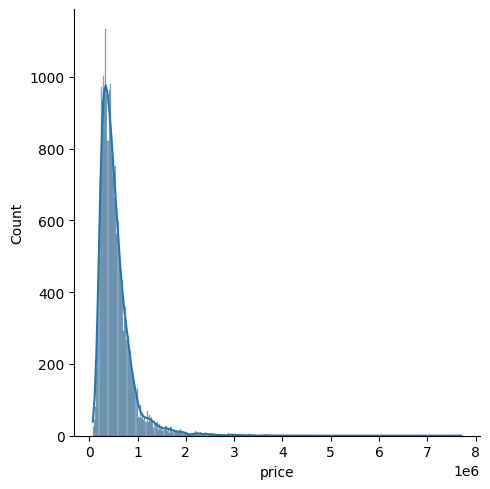

<Figure size 700x400 with 0 Axes>

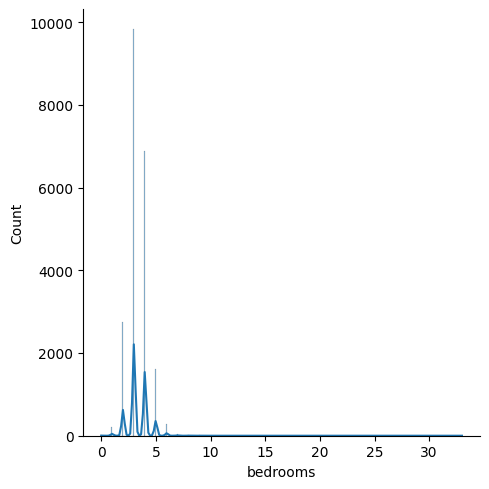

<Figure size 700x400 with 0 Axes>

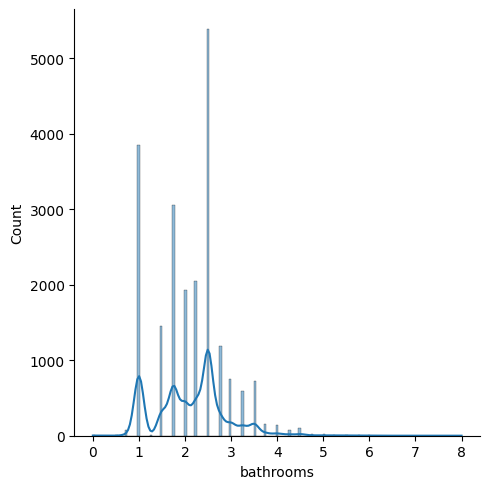

<Figure size 700x400 with 0 Axes>

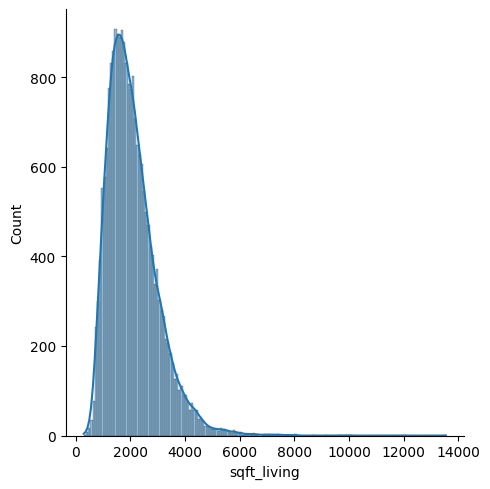

<Figure size 700x400 with 0 Axes>

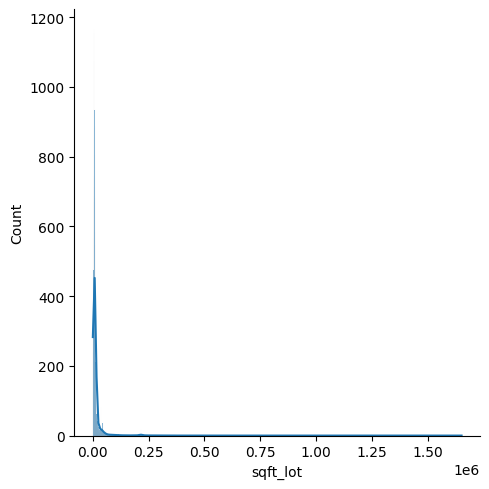

<Figure size 700x400 with 0 Axes>

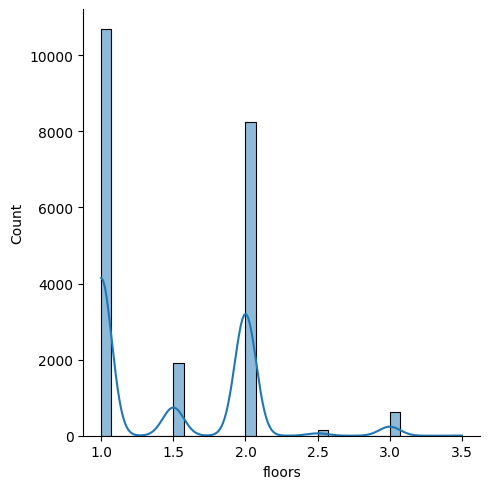

<Figure size 700x400 with 0 Axes>

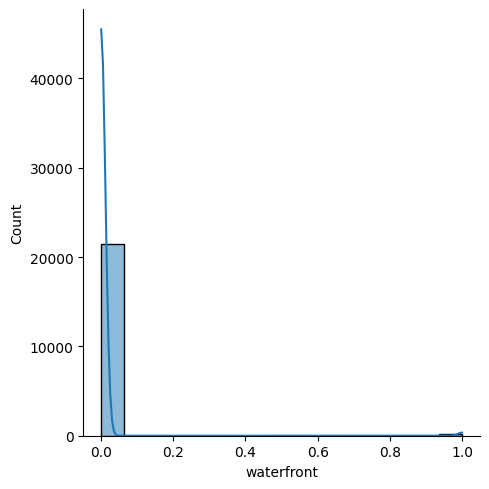

<Figure size 700x400 with 0 Axes>

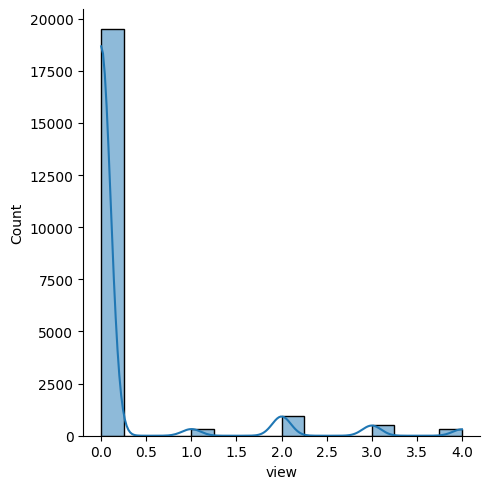

<Figure size 700x400 with 0 Axes>

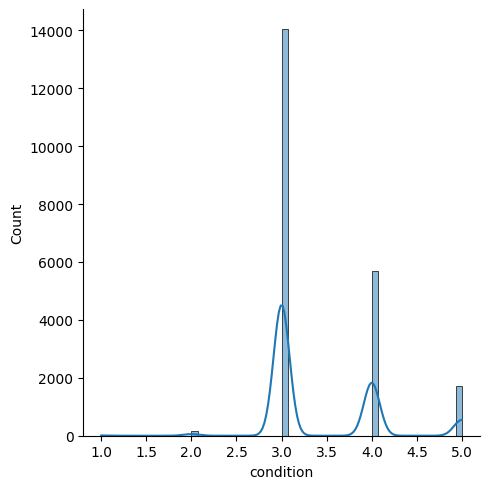

<Figure size 700x400 with 0 Axes>

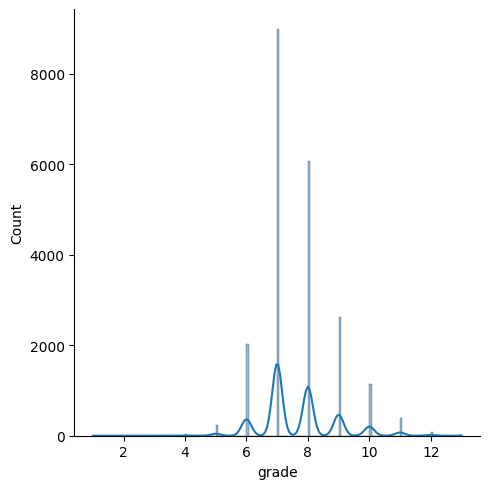

<Figure size 700x400 with 0 Axes>

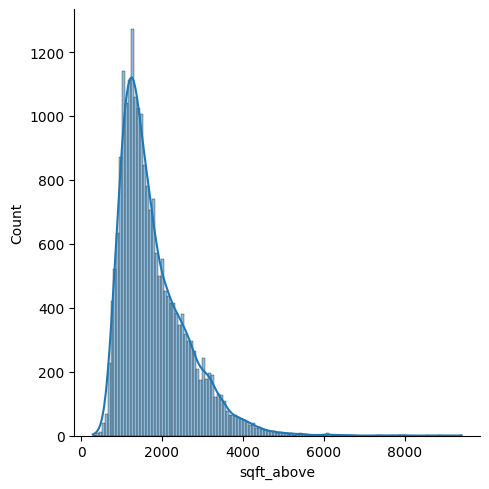

<Figure size 700x400 with 0 Axes>

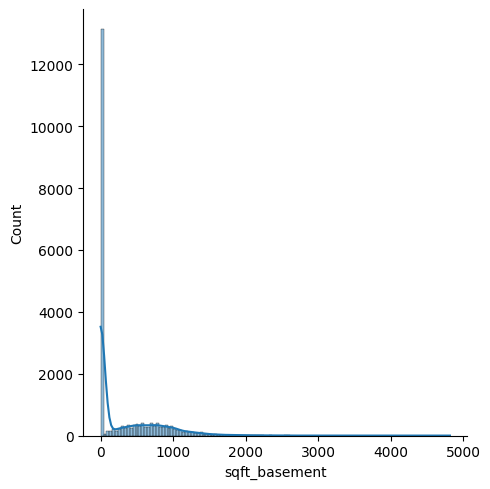

<Figure size 700x400 with 0 Axes>

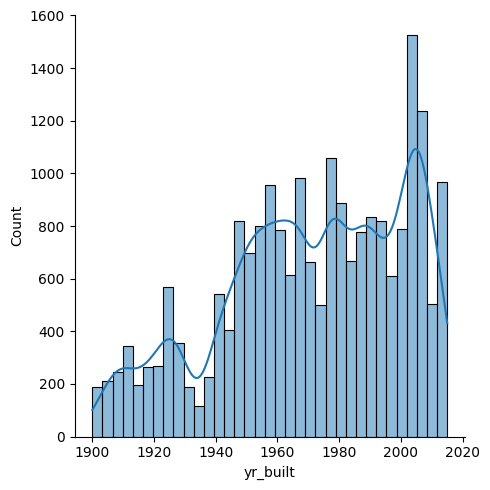

<Figure size 700x400 with 0 Axes>

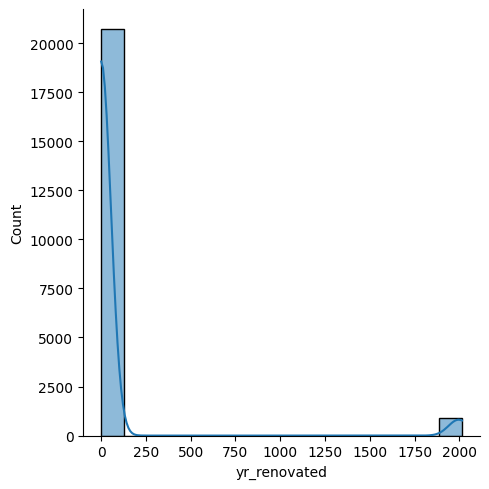

<Figure size 700x400 with 0 Axes>

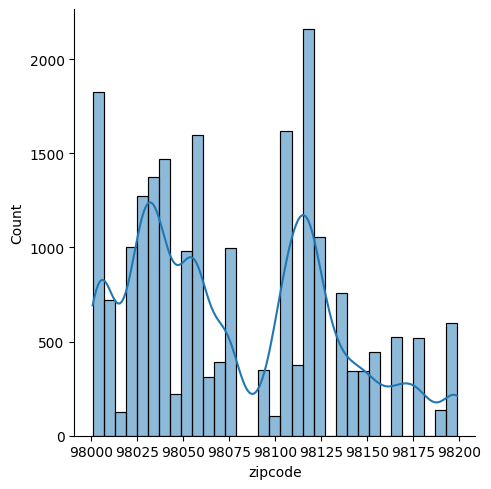

<Figure size 700x400 with 0 Axes>

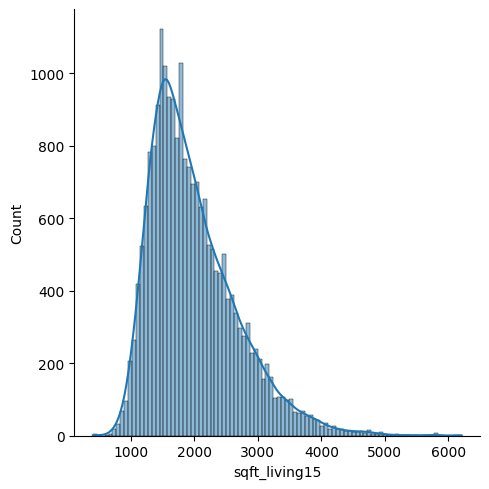

<Figure size 700x400 with 0 Axes>

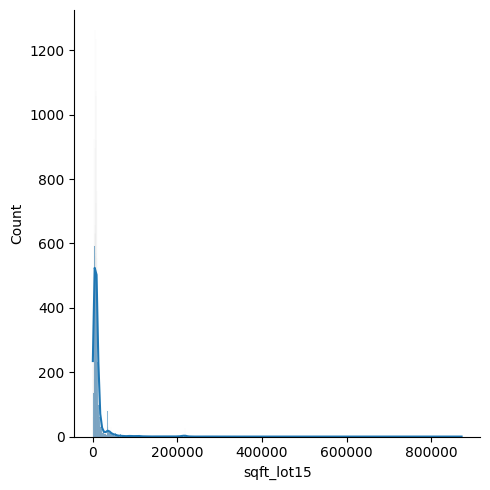

In [14]:
# let's plot all the columns to look at their distributions
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.displot(data=df, x=i, kde = True)
    plt.show()

### Problem 3.b. Fill in the Missing Observations

**Price**:
   - **Mean price**: The avg price of a house is around 500000 grand with prices ranging from 75k to 8 million. Most of the houses are either around 300k or 650k price range.
   - **Observation**: A lot of the observations lie within the 0-1 range, which suggests that most of the houses are within the 1 million price range

**Bedrooms**:
   - **Mean number of bedrooms**: 3.37, with most homes having between 3 to 4 bedrooms. There is an extreme outlier of a house with 33 bedrooms, which is likely an anomaly.
   - **Observation**: The data distribution is fairly centered around 3 bedrooms, which seems typical for homes in this region. The presence of homes with 0 bedrooms suggests either data entry errors or the inclusion of studio apartments.

**Bathrooms**:
   - **Mean number of bathrooms**: 2.11, with most homes having between 1.75 and 2.5 bathrooms.
   - **Observation**: The bathroom distribution shows a similar trend to bedrooms, with most homes having between 1.75 and 2.5 bathrooms, and a few outliers with up to 8 bathrooms. Homes with no bathrooms are likely errors or uninhabitable structures.

**Square Footage of Living Area**:
   - **Mean living area**: 2,080 sq ft, with a median of 1,910 sq ft. There is a wide range in square footage, with some homes as small as 290 sq ft and some as large as 13,540 sq ft.
   - **Observation**: The distribution of living area is right-skewed, with a small number of very large homes. The central tendency indicates that most homes are of moderate size, though there are luxury properties with very large living spaces.

**Square Footage of Lot**:
   - **Mean lot size**: 15,106 sq ft, with a median of 7,618 sq ft. There is considerable variation in lot size, with the largest lot being over 1.6 million sq ft.
   - **Observation**: Most homes have moderate to large lot sizes, but the extreme outliers (very large lots) skew the average. These outliers could represent properties like estates or rural homes.

**Floors**:
   - **Mean number of floors**: 1.49, with most homes having either 1 or 2 floors.
   - **Observation**: The majority of homes have between 1 and 2 floors, which is typical for suburban or urban single-family homes. The few homes with more than 3 floors are likely rare properties.

**Waterfront**:
   - **Waterfront presence**: The average value of the metric given to the variable waterfront is 0.01, which means that on average, it is very unliekly to find a house with a view to the waterfront.
   - **Observation**: A lot of the observatiosn falls within the 0.01 range, suggesting that most of the houses are not present in front of a waterfront

**View**:
   - **Mean view rating**: 0.23 (on a scale of 0 to 4), with most homes having a view rating of 0.
   - **Observation**: Most homes do not have notable views, and only a small percentage of properties have a view that could positively influence their market value.

**Condition**:
   - **Mean condition rating**: 3.4 (on a scale of 1 to 5).
   - **Observation**: The majority of homes are in good to fair condition, with very few homes falling at the extremes of the condition scale (either very poor or excellent condition).

**Grade**:
   - **Mean grade**: 7.66 (on a scale of 1 to 13), with the majority of homes receiving a grade between 7 and 8.
   - **Observation**: Most homes are considered to be of average or slightly above-average construction quality, with very few homes being rated at either end of the spectrum (1 or 13).

**Square Footage of Above-ground Living Area**:
   - **Mean above-ground square footage**: 1,788 sq ft, with a median of 1,560 sq ft.
   - **Observation**: The above-ground living area follows a similar pattern to total living space, indicating that most homes have significant above-ground space, with fewer homes having large basements.

**Square Footage of Basements**:
   - **Mean basement square footage**: 291 sq ft, with a median of 0.
   - **Observation**: Many homes in this dataset do not have basements, but for those that do, basement size varies significantly.

**Year Built**:
   - **Mean year built**: 1971, with the central 50% of homes being built between 1951 and 1997.
   - **Observation**: Most homes in the dataset were built in the mid-20th century, with relatively few homes being new or very old.

**Year Renovated**:
   - **Mean year renovated**: Some of the houses were never renovated, hence a minimum value of 0, while some of them were renovated recenlty in 2015.

   - **Observation**: The distribution is heavily skewed to the right. This means that there are a large number of properties that have been renovated in recent years , while only a small number of properties have been renovated in earlier years. The most frequent renovation year, appears to be around 0. This suggests that a large number of properties in the dataset have not been renovated at all.

**Latitude and Longitude**:
   - **Latitude and Longitude**: These geographic coordinates help identify the location of the homes. No major insights can be gathered without further geographic analysis.
   - **Observation**: Most homes are clustered around specific areas, with minimal outliers.

**Living Area of Nearby Homes (sqft_living15)**:
   - **Mean nearby living area**: 1,987 sq ft, with a median of 1,840 sq ft.
   - **Observation**: The living space of nearby homes is relatively consistent, indicating that neighborhoods tend to have similar-sized homes.

**Lot Size of Nearby Homes (sqft_lot15)**:
   - **Mean nearby lot size**: 12,768 sq ft, with a wide range of sizes.
   - **Observation**: The lot sizes of nearby homes show significant variation, with some neighborhoods having large lots and others having smaller, urban-style lots.

### Overall Univariate Analysis Summary:
The dataset shows a wide variety of home prices, sizes, and features. Most homes are moderately sized and priced, but the data includes several outliers that skew the averages, such as large estates or luxury properties. Features like the number of bedrooms, bathrooms, and square footage tend to cluster around typical values, while rarer features like waterfront access or significant renovations are less common but may have a large impact on property value.

### Transformation of Target Variable
The target variable is slightly skewed. In such cases it is a good idead to apply a log transformation in order to avoid contradicting the assumption of linearity which is a necessary condition for applying a linear regression model.

In [15]:
df['price_log'] = np.log(df['price'])

<Axes: xlabel='price_log', ylabel='Count'>

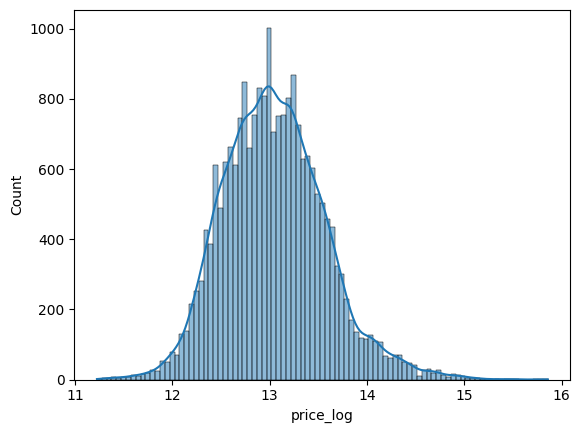

In [16]:
sns.histplot(data=df, x='price_log', kde = True)

### Observations
- The log-transformed variable (**price_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceeed.



---------------------------
## Bivariate Analysis
---------------------------


Another assumption that is necessary for using a linear regression model is that the independent variables are independent. If this condition is met, we can be relatively sure that the variable contribute unique information to the model. This can be checked by examining the relationships between the feature variables and examining the correlation matrix for multicollinearity.

### Problem 4.a. Check the correlations using a heatmap
Write the code to calculate and plot the correlation heatmap between the variables.

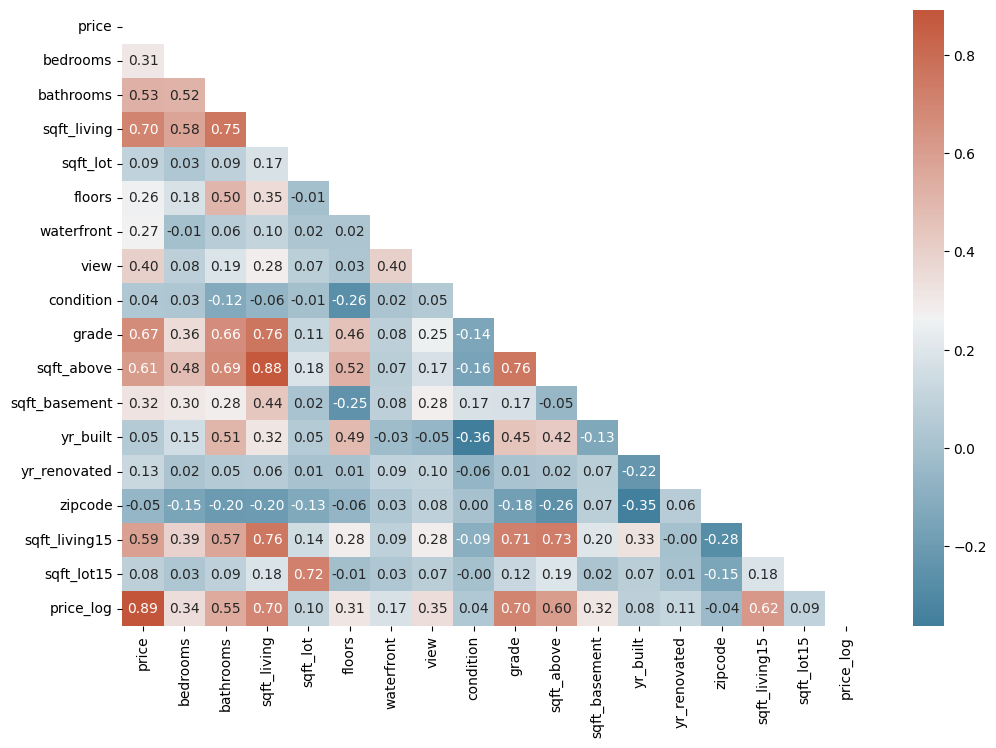

In [17]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr())

# Create a visual view of the pairwise correlations
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap, mask=matrix)
plt.show()

### Problem 4.b. Write your Observations  

Positive correlations of note are observed between:

sqft_living and sqft_above: This strong positive correlation indicates that larger homes tend to have more square footage above ground.

sqft_living and grade: A higher home grade is often associated with larger living space.

sqft_living and sqft_basement: Homes with larger living areas are more likely to have larger basements.

sqft_living and price_log: This strong positive correlation suggests that larger homes generally have higher prices.

sqft_above and price_log: Similar to sqft_living, homes with more square footage above ground are typically more expensive.  

Negative correlations of note are observed between:

bedrooms and price_log: While this correlation is relatively weak, it suggests that having more bedrooms might slightly decrease the price, potentially due to factors like family size preferences or maintenance costs.

zipcode and price_log: This negative correlation indicates that certain zip codes may be associated with lower property prices, possibly due to factors like location, amenities, or neighborhood characteristics.




- **Create a scatter plot to visualize the relationship between the features having significant correlations (>0.7)**

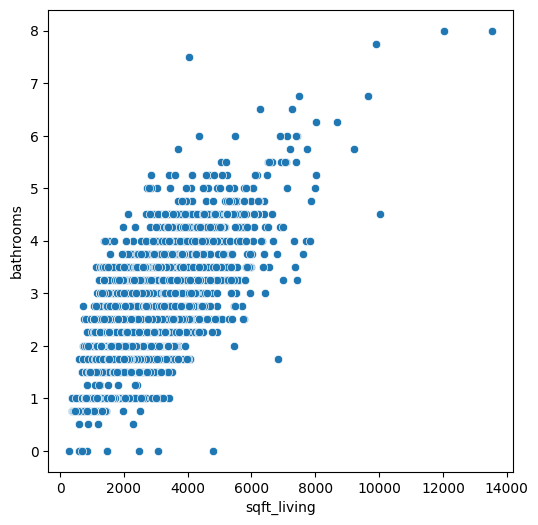

In [ ]:
# scatterplot to visualize the relationship between sqft_living and bathrooms
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='sqft_living', y='bathrooms')
plt.show()

### Observations
Not surprisingly, there is a positive association between living space and number of bathrooms. It makes sense that these measures of size would be correlated.

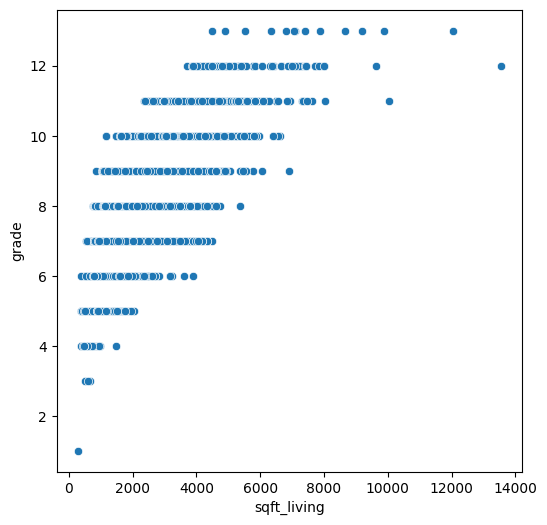

In [18]:
# scatterplot to visualize the relationship between sqft_living and grade
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='sqft_living', y='grade')
plt.show()

### Observations
The grade is a measure of home quality and appears to be positively associated with living space. Because more affluent individuals tend to purchase larger homes, it may be the case that these homebuyers also have higher quality standards.

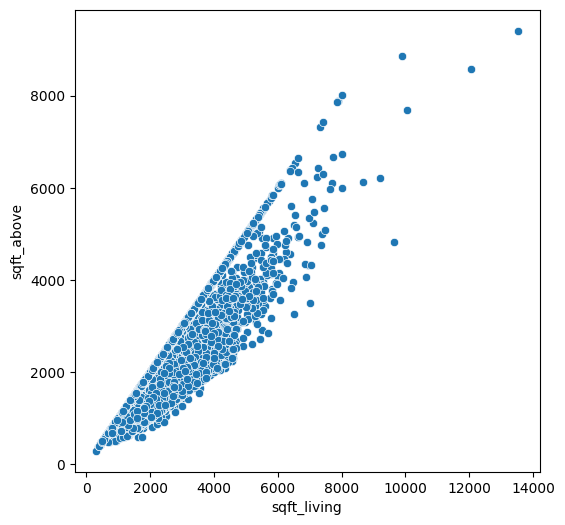

In [19]:
# scatterplot to visualize the relationship between sqft_living and sqft_above
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='sqft_living', y='sqft_above')
plt.show()

### Observations
The straigh line in the plot shows that for some homes, the sqft_above is exactly equal to the overall sqft_living. In general there is a positive association between these metrics.

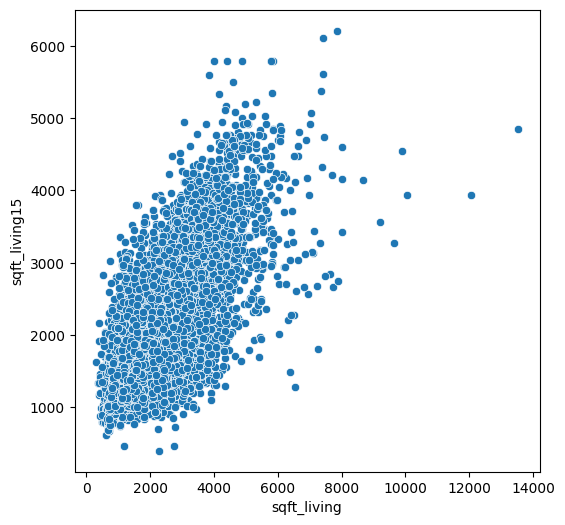

In [20]:
# scatterplot to visualize the relationship between sqft_living and sqft_living15
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='sqft_living', y='sqft_living15')
plt.show()

### Observations
The association between the living space in a home and the average living space of surrounding homes is moderate and positive with some outlying observations.

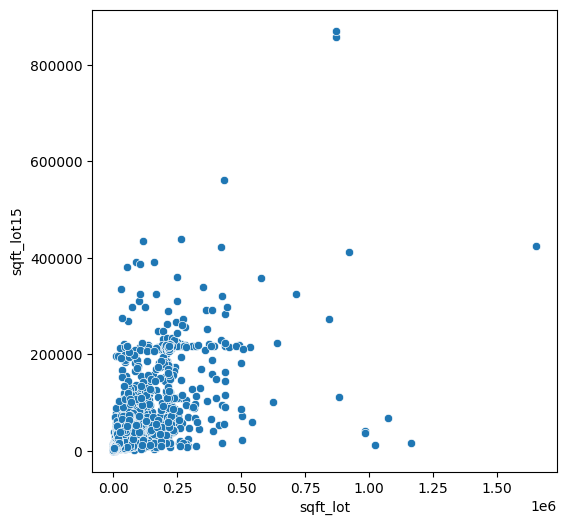

In [21]:
# scatterplot to visualize the relationship between sqft_lot15 and sqft_lot
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='sqft_lot', y='sqft_lot15')
plt.show()

### Observations
The correlation is likely high due to outliers. We can remove these extreme values and check the correlation on the truncated data.

In [ ]:
# remove the data corresponding to high sqft_lot
dft = df[df['sqft_lot'] < 125000]
dft=dft[dft['sqft_lot15']<600000]
# import the required function
from scipy.stats import pearsonr
# calculate the correlation
print('The correlation between sqft_lot and sqft_lot15 is', pearsonr(dft['sqft_lot'], dft['sqft_lot15'])[0])

The correlation between sqft_lot and sqft_lot15 is 0.7349498748682619


The correlation is still above 73, therefore we cannot conclude that the strong association is due to outliers alone.

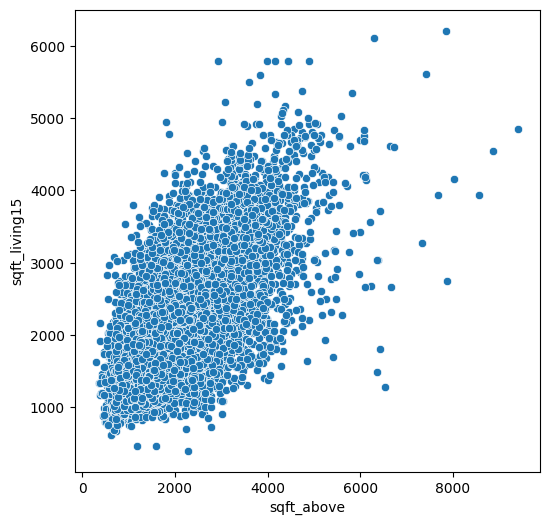

In [ ]:
# scatterplot to visualize the relationship between sqft_above and sqft_living15
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='sqft_above', y='sqft_living15')
plt.show()

### General Observations

There appear to be associations between some pairs of feature variables. This is not desiearable for linear regression. Later, we will use an automated method to identify variables that should be removed in order to avoid multicollinearity.

---------------------------
## Partitioning the Data
---------------------------


### Problem 5. Separate the target variable from the collection of feature variables.

In [22]:
# separate the dependent and indepedent variable
y = df['price_log']
X = df.drop(columns = ['price', 'price_log'])
# X = df.drop(['price', 'price_log'], axis=1) # alternative code

---
#### What Does `sm.add_constant(X)` Do?

In most statistical packages (including `statsmodels`), the regression function does not automatically include the intercept term in the model. By adding the intercept manually with `sm.add_constant(X)`, you are explicitly adding a column of 1’s to the design matrix \(X\), which corresponds to the intercept in the linear regression equation.

Here's what happens:
- **Without the intercept term**, the model assumes that when all independent variables are zero, the predicted value of \(y\) is also zero, which may not reflect the real-world scenario.
- **With the intercept term** (added using `sm.add_constant(X)`), the model can better fit the data because it is not constrained to go through the origin. It allows for a more flexible and accurate regression line.

#### Why is this Step Important?

1. **Realistic Predictions**: In most cases, setting all the predictors to zero doesn't imply that the target variable should also be zero. For example, in predicting house prices, when variables like square footage or number of bedrooms are zero, it doesn’t mean the price of the house is zero. The intercept captures the baseline house price when these features are minimal.

2. **Better Model Fit**: By including an intercept, the regression model has more freedom to fit the data. Without the intercept, the model might miss the true underlying relationship between the independent variables and the target variable.

3. **Interpreting the Model**: Including the intercept makes the interpretation of the model clearer and more intuitive. The intercept tells us the predicted value of the target variable when all predictors are zero, which is an important aspect of understanding the overall relationship.

---
Adding the intercept term with `sm.add_constant(X)` ensures that your regression model is flexible enough to capture realistic patterns in the data and avoids the assumption that the relationship must pass through the origin. It is a crucial step for making accurate predictions and understanding the true nature of the data.



### Problem 6. Add the constant term

In [23]:
# add the intercept term
X = sm.add_constant(X)

### Split the data into training and testing sets
The code below performs a **train-test split** on your dataset, where 70% of the data is used for training the model and 30% is reserved for testing.

---

```python
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
```

#### **`train_test_split`**:
   - This function is from the `sklearn.model_selection` module, and it is used to split your dataset into training and testing subsets.
   - It takes your independent variables (`X`) and the target variable (`Y`) and splits them according to the `test_size` parameter.

#### **Parameters**:

- **`X`**:
   - This is the matrix of independent variables (features) you are using to predict the target variable. In this case, it could represent columns like square footage, number of bedrooms, number of bathrooms, etc.
   
- **`Y`**:
   - This is the target variable that you are trying to predict, such as house prices.

- **`test_size=0.30`**:
   - This argument specifies that 30% of the dataset will be used as the test set, while the remaining 70% will be used for training. The ratio is often chosen based on the need to balance the amount of data available for training while still reserving enough data to evaluate the model.

   - **Training data**: This subset of the data will be used to **train** your model. The model will learn patterns from this data.
   - **Testing data**: The test set is held back and used only after the model has been trained, so you can evaluate how well the model performs on unseen data. This helps assess the model's generalizability.

- **`random_state=1`**:
   - This parameter sets a seed for the random number generator, ensuring that the split is reproducible. Every time you run the code with the same `random_state`, you will get the same train-test split. This is important for reproducibility, so others can get the same results or for comparison purposes if you rerun the model.

#### **Outputs**:

- **`X_train`**:
   - This is the training subset of your independent variables (70% of the total data in this case).

- **`X_test`**:
   - This is the testing subset of your independent variables (30% of the total data).

- **`y_train`**:
   - This is the training subset of your target variable, corresponding to the features in `X_train`.

- **`y_test`**:
   - This is the testing subset of your target variable, corresponding to the features in `X_test`.

### Problem 7. Split the data into training and testing sets

In [26]:
#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Check for Multicollinearity

#### **Decision Rules**
VIF < 5: Generally considered acceptable. This indicates low multicollinearity, and the independent variable is likely not problematic in terms of multicollinearity.

VIF between 5 and 10: This suggests moderate multicollinearity. It's worth paying attention to variables with VIFs in this range, especially if there are multiple variables around or above this level.

VIF > 10: This is the most common threshold used to indicate high multicollinearity. If a variable's VIF exceeds 10, it's generally considered problematic, and you may want to consider removing, transforming, or combining variables to reduce multicollinearity.  
  
---

#### **Importing `variance_inflation_factor`**:

```python
from statsmodels.stats.outliers_influence import variance_inflation_factor
```

This imports the `variance_inflation_factor` function from the `statsmodels` library, which is used to measure **multicollinearity** among the independent variables (features) in your dataset.

---

#### **What is VIF (Variance Inflation Factor)?**

- VIF is a metric that helps detect **multicollinearity** in a regression model. **Multicollinearity** occurs when two or more independent variables are highly correlated, meaning that they carry redundant information.
  
- High multicollinearity can lead to:
   - **Instability in regression coefficients** (making it difficult to interpret the effects of individual predictors).
   - **Inefficient estimates** and inflated standard errors, which reduce the reliability of the model.

- The **VIF score** for each feature indicates how much that feature's variance is inflated due to multicollinearity with other features.
   - A VIF of **1** indicates no multicollinearity.
   - A VIF between **1 and 5** suggests moderate multicollinearity.
   - A VIF above **5** or **10** suggests high multicollinearity, and you might consider removing or transforming some of the highly correlated features.

---

#### **The `checking_vif` Function**:

```python
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif
```

This function computes the **VIF** for each feature (column) in the training dataset. Here's how it works:

- **Input**: The function takes `train`, which is the matrix of independent variables (in this case, `X_train`).
- **VIF Calculation**:
  - For each feature, the `variance_inflation_factor` function is applied to compute the VIF score. It does this by treating one feature as a dependent variable and regressing it against all other features to determine how much of its variance is explained by them.
  - The result is stored in the `vif` DataFrame, with one row for each feature and its corresponding VIF score.
- **Output**: The function returns a DataFrame containing each feature and its VIF value.

---

#### **Printing VIF Values**:

```python
print(checking_vif(X_train))
```

This line prints the VIF values for each feature in the `X_train` dataset. It helps identify if any of the features have a high VIF, which might indicate multicollinearity problems. If you find a feature with a high VIF, you may consider removing or transforming it to improve the model.

---

### Why is This Step Important?

**Detecting Multicollinearity**:
   - High multicollinearity can make it difficult to understand the relationship between independent variables and the target variable because the effects of one variable are not independent of others.
   
**Improving Model Stability**:
   - By identifying and addressing multicollinearity, you can improve the stability and reliability of your regression model’s coefficients.

**Feature Selection**:
   - If you discover that some features have high VIF values, you can choose to remove them from the model, which can lead to a simpler and more interpretable model.

---
This step uses the Variance Inflation Factor (VIF) to check for multicollinearity among the independent variables in the training data. By calculating VIF scores, you can detect and address highly correlated features, which helps improve the reliability and interpretability of your regression model.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train))

          feature                VIF
0           const  4476366.966285138
1        bedrooms 1.6154176830738383
2       bathrooms 3.2902551998090734
3     sqft_living                inf
4        sqft_lot  2.283850130007587
5          floors 1.9610273597136982
6      waterfront  1.212199109933431
7            view  1.427570776888475
8       condition 1.2470966480100671
9           grade  3.246153888105874
10     sqft_above                inf
11  sqft_basement                inf
12       yr_built  2.201245920159723
13   yr_renovated 1.1489637563713173
14        zipcode 1.3005102153772665
15  sqft_living15  2.898792189886781
16     sqft_lot15 2.3141782040408874


### Drop variables with high VIF (*do not drop the constant*)

### Problem 8.a. Which variables should be dropped

**Drop the columns labeled:**
- sqft_living
- sqft_basement
- sqft_above

from the training data and testing data and check if multicollinearity is removed

### Problem 8.b. Drop the columns indicated above from the training and testing sets.

In [28]:
# create the model after dropping variables with high VIF
X_train = X_train.drop(columns=['sqft_living','sqft_above','sqft_basement']) #Write your code here
X_test = X_test.drop(columns=['sqft_living','sqft_above','sqft_basement'])

# check for VIF
print(checking_vif(X_train))

          feature                VIF
0           const  4405488.148535739
1        bedrooms  1.432886986039324
2       bathrooms 2.6529179158789478
3        sqft_lot 2.2719147056544022
4          floors 1.6167276245696873
5      waterfront  1.210669127183965
6            view 1.3864575608265572
7       condition 1.2404580353852206
8           grade 2.7809555844612097
9        yr_built 2.1502521484472794
10   yr_renovated 1.1488818814781145
11        zipcode 1.2781447817698717
12  sqft_living15  2.366664836474635
13     sqft_lot15 2.3045998359906483


### Build the Linear Regression Model
Now, we will create the linear regression model as the VIF is less than 10 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

**Write the code to create the linear regression model using statsmodels OLS and print the model summary. Write your observations from the model.**

This code performs **Ordinary Least Squares (OLS) regression** using the `statsmodels` library:

**Creating the model**:
   ```python
   model1 = sm.OLS(y_train, X_train).fit()
   ```
   - This line creates and fits an OLS regression model using the training data (`X_train` for the independent variables and `y_train` for the target variable).
   - The `.fit()` method trains the model by finding the best-fitting regression line.

**Getting the model summary**:
   ```python
   model1.summary()
   ```
   - This line generates a detailed summary of the regression model, providing key statistics like R-squared, p-values, coefficients, and standard errors to evaluate the model's performance and interpret the results.

In short, the code fits an OLS regression model and then displays a summary of the model's performance.

In [29]:
# create the model
model1 = sm.OLS(y_train,X_train).fit() #write your code here
# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2115.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:44:55   Log-Likelihood:                -3946.7
No. Observations:               15129   AIC:                             7921.
Df Residuals:                   15115   BIC:                             8028.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -21.4031      5.362     -3.991      0.000     -31.914     -10.892
bedrooms          0.0041      0.003      1.272      0.204      -0.002       0.011
bathrooms         0.1404      0.005     25.818      0.000       0.130       0.151
sqft_lot       2.525e-07   9.24e-08      2.734      0.006    7.15e-08    4.34e-07
floors            0.0807      0.006     13.445      0.000       0.069       0.092
waterfront        0.3628      0.032     11.449      0.000       0.301       0.425
view              0.0476      0.004     12.149      0.000       0.040       0.055
condition         0.0461      0.004     10.471      0.000       0.037       0.055
grade             0.2298      0.004     63.605      0.000       0.223       0.237
yr_built         -0.0056      0.000    -44.209      0.000      -0.006      -0.005
yr_renovated   8.937e-06   6.78e-06      1.319      0.187   -4.34e-06    2.22e-05
zipcode           0.0004   5.38e-05      8.129      0.000       0.000       0.001
sqft_living15     0.0002   5.74e-06     27.989      0.000       0.000       0.000
sqft_lot15    -2.905e-07   1.38e-07     -2.103      0.035   -5.61e-07   -1.98e-08
==============================================================================
Omnibus:                       26.261   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.323
Skew:                          -0.044   Prob(JB):                     2.60e-07
Kurtosis:                       3.201   Cond. No.                     2.11e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observations
Here are a few brief observations based on the OLS regression results:

**R-squared (0.645)**:
   - This indicates that approximately 64.5% of the variability in the log-transformed house prices is explained by the independent variables in the model. This suggests a reasonably strong model fit.

**Significant Variables**:
   - Several variables have **p-values below 0.05**, indicating they are statistically significant predictors of house prices, including:
     - **Bathrooms**: Coefficient of 0.1404, indicating a positive relationship with house prices.
     - **Floors**: Positive effect (0.0807), meaning houses with more floors are associated with higher prices.
     - **Waterfront**: Strong positive impact (0.3628), significantly increasing house prices.
     - **Grade**: A very high positive coefficient (0.2298), suggesting house quality significantly impacts price.
     - **Year Built**: Negative coefficient (-0.0056), suggesting older houses are associated with lower prices.
   
**Insignificant Variables**:
   - **Bedrooms** and **Year Renovated** have p-values above 0.05, indicating they do not significantly contribute to predicting house prices in this model.

**Negative Coefficients**:
   - Variables such as **sqft_lot15** and **yr_built** have negative coefficients, implying that larger lots or older homes are associated with lower prices.

**F-statistic and p-value (F-statistic: 2115, p-value: 0.000)**:
   - The overall model is statistically significant, meaning that the combination of predictors reliably explains variations in house prices.

In summary, the model explains a large portion of the variance in house prices, and several variables, such as bathrooms, waterfront, view, and grade, have strong positive associations with prices, while some variables like bedrooms and renovations are less impactful.

### Dropping Statistically Insignificant Variables

Based on the OLS regression results, the variables that have high p-values (greater than 0.05) and should be considered for removal are:

1. **Bedrooms** (p-value: 0.204) – not statistically significant.
2. **Year Renovated** (p-value: 0.187) – not statistically significant.

These variables have p-values above the commonly used significance threshold (0.05), meaning they do not contribute significantly to the prediction of house prices and can be dropped from the model.

In [30]:
# List of columns to drop based on high p-values
columns_to_drop = ['bedrooms', 'yr_renovated']

# Dropping the columns from the training set
X_train_reduced = X_train.drop(columns=columns_to_drop)

# Dropping the columns from the test set as well, if it is needed for further model evaluation
X_test_reduced = X_test.drop(columns=columns_to_drop)

# Now, you can rerun the regression model on the reduced dataset
model2 = sm.OLS(y_train, X_train_reduced).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2499.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:44:59   Log-Likelihood:                -3948.3
No. Observations:               15129   AIC:                             7921.
Df Residuals:                   15117   BIC:                             8012.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -20.5798      5.343     -3.852

In [31]:
X_train_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15129 entries, 2060 to 235
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          15129 non-null  float64
 1   bathrooms      15129 non-null  float64
 2   sqft_lot       15129 non-null  int64  
 3   floors         15129 non-null  float64
 4   waterfront     15129 non-null  int64  
 5   view           15129 non-null  int64  
 6   condition      15129 non-null  int64  
 7   grade          15129 non-null  int64  
 8   yr_built       15129 non-null  int64  
 9   zipcode        15129 non-null  int64  
 10  sqft_living15  15129 non-null  int64  
 11  sqft_lot15     15129 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.5 MB


In [32]:
X_test_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6484 entries, 15544 to 18802
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          6484 non-null   float64
 1   bathrooms      6484 non-null   float64
 2   sqft_lot       6484 non-null   int64  
 3   floors         6484 non-null   float64
 4   waterfront     6484 non-null   int64  
 5   view           6484 non-null   int64  
 6   condition      6484 non-null   int64  
 7   grade          6484 non-null   int64  
 8   yr_built       6484 non-null   int64  
 9   zipcode        6484 non-null   int64  
 10  sqft_living15  6484 non-null   int64  
 11  sqft_lot15     6484 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 658.5 KB


### Check the below linear regression assumptions

- **Mean of Residuals**: Should be close to 0 to indicate unbiased predictions.
- **No Heteroscedasticity**: Residuals should have constant variance across different levels of the predictors.
- **Linearity of Variables**: The relationship between predictors and the target variable should be linear, which can be checked by examining residual plots.
- **Normality of Error Terms**: Residuals should be normally distributed, which can be verified using Q-Q plots and histograms.

By checking these assumptions, we ensure that the linear regression model is reliable and can produce valid predictions.

To check the assumptions of linear regression based on the Boston House Price example, we need to write code and explain each assumption:

### 1. **Mean of Residuals Should Be 0**

The residuals (the difference between the actual and predicted values) should have a mean close to 0. If the mean of the residuals is significantly different from 0, it indicates a bias in the predictions.

#### Explanation:
If the mean of the residuals is close to 0, the model is unbiased, meaning that the errors are evenly distributed around the predicted values. A value close to 0 indicates that the model’s predictions are generally accurate.

In [33]:
# Calculate the residuals
y_pred = model2.predict(X_train_reduced)
residuals = y_train - y_pred

# Check the mean of residuals
mean_residuals = np.mean(residuals)
print(f"Mean of residuals: {mean_residuals}")

Mean of residuals: -3.678531264305809e-12


### 2. **No Heteroscedasticity**

Heteroscedasticity occurs when the residuals have unequal variance across different levels of the independent variables. In a well-fitted model, the residuals should have constant variance (homoscedasticity). We can use a **residuals vs. fitted values plot** to check for heteroscedasticity.

#### Explanation:
- If the residuals are randomly scattered around 0 without any clear pattern, it indicates **homoscedasticity**.
- If there’s a funnel-shaped pattern (i.e., the spread of residuals increases or decreases with the predicted values), it indicates **heteroscedasticity**, which violates this assumption.

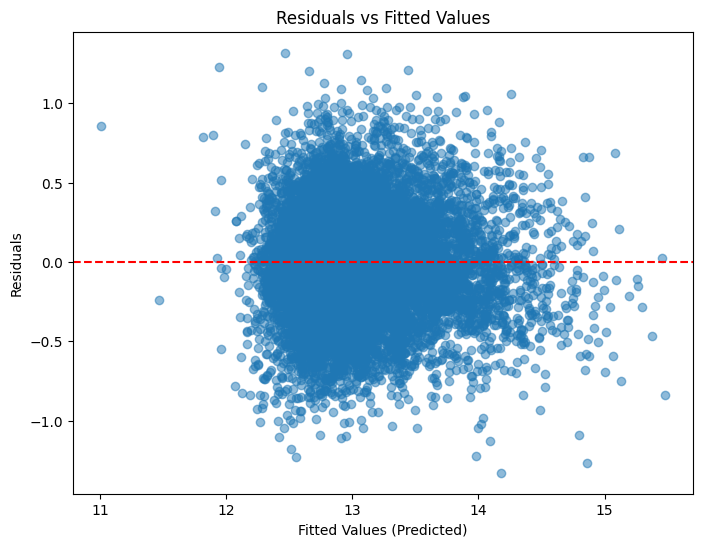

In [34]:
#### Code:

# Plot residuals vs fitted values to check for heteroscedasticity
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.show()


### Goldfeldquandt Test for Homoscedasticity
* Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

* Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

* We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

** Decision Rule **
   
The **Goldfeld-Quandt test** is used to check for **heteroscedasticity** (non-constant variance of residuals) in a regression model. Here’s a breakdown of the decision rule when performing the test:

### Decision Rule for the Goldfeld-Quandt Test:
- **Reject \(H_0\)**: If the F-statistic is large (or p-value < 0.05), there is evidence of **heteroscedasticity** (variance of residuals is not constant).
- **Fail to reject \(H_0\)**: If the F-statistic is small (or p-value > 0.05), there is **no significant evidence** of heteroscedasticity, and the residuals are likely homoscedastic (constant variance). ◀ ASSUMPTION VERIFIED

This decision rule helps assess whether the assumption of homoscedasticity is violated in a regression model, which is important for ensuring the accuracy of standard errors and hypothesis tests.


In [35]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [37]:
##import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 0.9960164878737827), ('p-value', 0.5688354953391275)]

**Observations:____**  
The p-value is larger than 0.05 therefore we fail to reject the premise that the resduals are homoskedastic and conclude that there is not heteroskedasitcity present in the residuals. This means we can assume that the residuals have a constant variance. This satisfies the linear assumption of constant variance of residual terms.

### 3. **Linearity of Variables**

The relationship between the independent variables and the dependent variable should be linear. We can check this by plotting the residuals against each predictor variable to see if there's any systematic pattern.


#### Explanation:
- If the residuals show random scatter around 0 for each independent variable, the assumption of linearity is satisfied.
- If you observe patterns (e.g., curved or systematic patterns), this suggests non-linearity between the independent variable and the dependent variable, which violates this assumption.

In [38]:
X_train_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15129 entries, 2060 to 235
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          15129 non-null  float64
 1   bathrooms      15129 non-null  float64
 2   sqft_lot       15129 non-null  int64  
 3   floors         15129 non-null  float64
 4   waterfront     15129 non-null  int64  
 5   view           15129 non-null  int64  
 6   condition      15129 non-null  int64  
 7   grade          15129 non-null  int64  
 8   yr_built       15129 non-null  int64  
 9   zipcode        15129 non-null  int64  
 10  sqft_living15  15129 non-null  int64  
 11  sqft_lot15     15129 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.5 MB


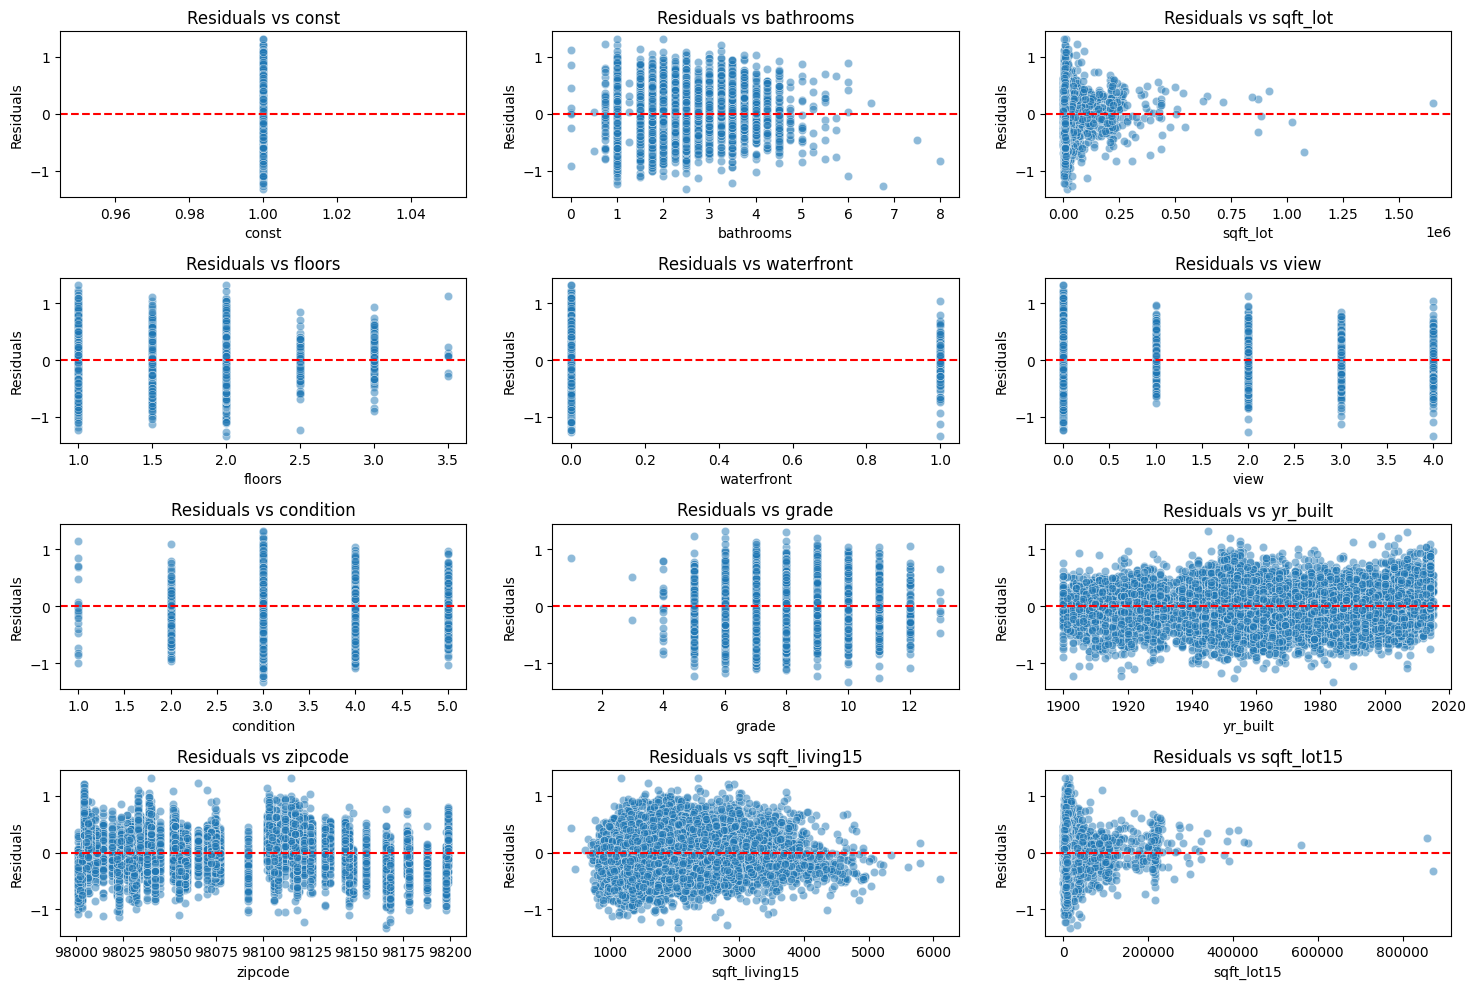

In [39]:
#### Code:
# Plot residuals vs individual predictor variables to check for linearity
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(X_train_reduced.columns):
    sns.scatterplot(x=X_train_reduced[col], y=residuals, ax=axs[i], alpha=0.5)
    axs[i].axhline(0, color='r', linestyle='--')
    axs[i].set_title(f'Residuals vs {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

### 4. **Normality of Error Terms**

The residuals (errors) should be normally distributed. This can be checked using a **Q-Q (Quantile-Quantile) plot** or by plotting the distribution of the residuals.

#### Explanation:
- In the **Q-Q plot**, if the residuals follow the reference line closely, the residuals are normally distributed, and the normality assumption is satisfied.
- In the **histogram**, the residuals should be roughly bell-shaped (following a normal distribution). If the residuals are skewed, it suggests a violation of the normality assumption.


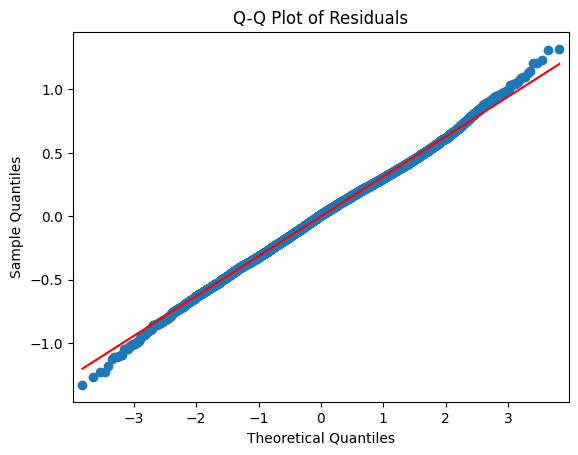

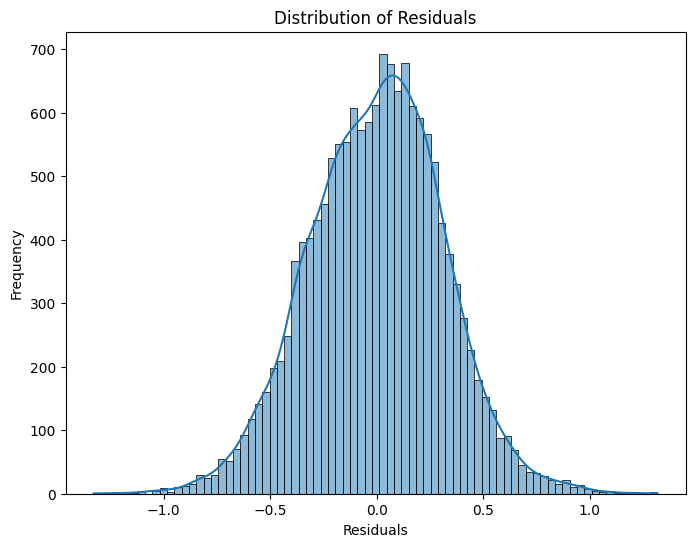

In [40]:
#### Code:
# Q-Q plot to check normality of residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Observations
The Q-Q plot and histogram confirm that the residuals are normally distributed.

### Problem 9. Write your general observations regarding the checking of assumptions. Did this analysis confirm that it is appropriate to proceed with the analysis and utlize this model for prediction? (3-4 sentences)

Yes it does as the mean of residuals is closer to 0, there is No Heteroscedasticity, it shows a random scatter around 0 and the errors are normally distributed




### Checking the Performance of the Model Across Training and Testing Data
Here we create several helper functions that we can use to check the performance metrics of the linear regression model.

- **RMSE** (Root Mean Squared Error):
   - RMSE measures the average magnitude of the errors between predicted and actual values. It gives higher weight to larger errors, making it sensitive to outliers. A lower RMSE indicates a better fit.
   - Formula:  
$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$


- **MAPE** (Mean Absolute Percentage Error):
   - MAPE represents the average of the absolute percentage errors between the predicted and actual values. It provides a relative error measure, making it easy to interpret as a percentage.
   - Formula:  
$$
MAPE = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100
$$


- **MAE** (Mean Absolute Error):
   - MAE measures the average of the absolute differences between predicted and actual values. It provides a simple measure of error, giving equal weight to all errors.
   - Formula:  
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$



In [41]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test, y_train, y_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train_reduced, X_test_reduced, y_train, y_test )

    Data               RMSE                 MAE               MAPE
0  Train 0.3141264299389507  0.2504194863863599 1.9255487845408166
1   Test 0.3163090201165535 0.25054500613650016 1.9254004725810208


### Observations
The performance metrics for the training and testing sets are very similar. We can therefore conclude that the model is not overfitting and can reasonably be applied to new data without the risk of misrepresenting the results.

### Back-transforming coefficients from log scale
[See reference](https://library.virginia.edu/data/articles/interpreting-log-transformations-in-a-linear-model)

When the target variable is transormed to a log scale, the coefficients may be exponetiated to more interpretable values.

The results are then interpreted as the factor by which the target variable changes for each unit increase in the feature variable. Subtracting 1 from this value and multiplying by 100% yields the percent change in the target variable for each unit increase in the feature variable.

In [42]:
coef = model2.params #write your code here
out_p=pd.DataFrame((np.exp(coef)-1)*100, columns=['Coefficients'])
out_p

,Coefficients
const,-99.9999998845724
bathrooms,15.501516740530796
sqft_lot,2.522077813260637e-05
floors,8.405411886211422
waterfront,43.82828920370958
view,4.866471038821474
condition,4.638685018581268
grade,25.84986886854299
yr_built,-0.569497090005866
zipcode,0.04304431830601807


### Interpretations of Coefficients
Here are the interpretations for the coefficients based on the provided results:

**Bathrooms (15.5)**:  
   For each additional bathroom, the model predicts a 15.5% increase in the selling price of the home.

**Sqft Lot (2.52e-05)**:  
   For each additional 1000 square foot of lot size, the model predicts a 2.5% increase in the selling price. Although the effect is positive, it's very small and likely has minimal impact on the overall price.

**Floors (8.41)**:  
   The model predicts that homes with additional floors will have an 8.4% higher selling price compared to homes with fewer floors, assuming all other factors remain constant.

**Waterfront (43.83)**:  
   Waterfront homes are predicted to have a 43.8% higher selling price compared to non-waterfront homes, making waterfront a highly influential factor in determining house prices.

**View (4.87)**:  
   If a house has been viewed, the model predicts a 4.87% increase in the selling price of the home, indicating that homes that have been viewed tend to sell for higher prices.

**Condition (4.64)**:  
   For each improvement in the condition rating (on a scale), the model predicts a 4.64% increase in the selling price of the home.

**Grade (25.85)**:  
   For each increase in the grade (quality of construction and design), the model predicts a 25.9% increase in the selling price of the home, making it one of the most significant factors influencing price.

**Year Built (-0.57)**:  
   For each additional year the home ages, the model predicts a 0.57% decrease in the selling price, suggesting that older homes tend to sell for slightly less compared to newer ones.

**Sqft Living 15 (0.016)**:  
   For each additional 1000 square foot of living space in nearby homes, the model predicts a 16% increase in the selling price of the home, indicating that larger homes in the surrounding area can slightly increase a home's value.

**Sqft Lot 15 (-2.93e-05)**:  
   For each additional 1000 square foot of lot size in nearby homes, the model predicts a 2.9% decrease in the selling price of the home. This negative coefficient suggests that homes surrounded by larger lots might see slightly lower selling prices, but the effect is very small.

---

### Summary:
- Key features such as **bathrooms**, **waterfront**, **grade**, and **floors** have substantial positive effects on house prices.
- While **sqft lot** and **sqft lot15** have minimal influence, **year built** has a small negative impact, meaning older homes are predicted to sell for less.

These results can be used to make informed decisions about which home features to emphasize when pricing or investing in real estate.



### Problem 10. Write your overall conclusions and business recommendations based on the analysis.

### Conclusions:
Location Matters: Waterfront properties and homes with good views are highly desirable and command premium prices.

Quality and Condition: Homes with high-quality construction (grade) and good condition are more valuable.

Space: While larger living spaces and bathrooms positively impact prices, lot size plays a less significant role.

Neighborhood Factors: The size of homes and lots in the surrounding neighborhood can have a minor influence on pricing.

Age: Older homes might sell for slightly less, but this effect is relatively small.

### Business Recommendations:
Prioritize Waterfront and Views: When investing in or selling properties, focus on those with waterfront access or desirable views.

Improve Quality and Condition: Invest in upgrades to enhance the quality and condition of your property, as these factors significantly influence value.

Consider Bathroom Additions: Adding bathrooms can be a cost-effective way to increase a home's selling price.

Evaluate Neighborhood Factors: When considering a property, assess the size and quality of homes in the surrounding neighborhood.

Balance Price and Age: While older homes might be more affordable, consider the potential for future renovations and upgrades.
